In [49]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics


# Importing data


In [50]:
os.chdir("D:\\Data")
os.getcwd()

'D:\\Data'

In [51]:
data=pd.read_csv("credit-card-data.csv")

# Exploratory analysis


In [52]:
data = data.drop(columns = ['CUST_ID'])        #REMOVING IRRELEVANT COLUMNS


In [53]:
def var_summary(x):
    return pd.Series([x.isnull().sum(), x.mean(), x.median(), x.quantile(0.99), x.max()], 
                  index=['MISSING VALUES','MEAN','MEDIAN','P99', 'MAX'])

num_summary=data.apply(lambda x: var_summary(x)).T
num_summary

,MISSING VALUES,MEAN,MEDIAN,P99,MAX
BALANCE,0.0,1564.474828,873.385231,9338.804814,19043.13856
BALANCE_FREQUENCY,0.0,0.877271,1.000000,1.000000,1.00000
PURCHASES,0.0,1003.204834,361.280000,8977.290000,49039.57000
ONEOFF_PURCHASES,0.0,592.437371,38.000000,6689.898200,40761.25000
INSTALLMENTS_PURCHASES,0.0,411.067645,89.000000,3886.240500,22500.00000
CASH_ADVANCE,0.0,978.871112,0.000000,9588.163357,47137.21176
PURCHASES_FREQUENCY,0.0,0.490351,0.500000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,0.0,0.202458,0.083333,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,0.0,0.364437,0.166667,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,0.0,0.135144,0.000000,0.833333,1.50000


replacing missing data with median


In [54]:
data.MINIMUM_PAYMENTS =data.MINIMUM_PAYMENTS.fillna(data.MINIMUM_PAYMENTS.median())
data.CREDIT_LIMIT =data.CREDIT_LIMIT.fillna(data.CREDIT_LIMIT.median())

# Outlier Treatment


In [55]:
for col in data.columns:
    percentiles = data[col].quantile([0.01,0.99]).values
    data[col] = np.clip(data[col], percentiles[0], percentiles[1])

# Data after missing and outlier treatment


In [56]:

def var_summary(x):
    return pd.Series([x.isnull().sum(), x.mean(), x.median(), x.quantile(0.99), x.max()], 
                  index=['MISSING VALUES','MEAN','MEDIAN','P99', 'MAX'])

num_summary=data.apply(lambda x: var_summary(x)).T
num_summary

,MISSING VALUES,MEAN,MEDIAN,P99,MAX
BALANCE,0.0,1541.046707,873.385231,9337.094398,9338.804814
BALANCE_FREQUENCY,0.0,0.878083,1.000000,1.000000,1.000000
PURCHASES,0.0,936.229237,361.280000,8961.796200,8977.290000
ONEOFF_PURCHASES,0.0,536.493774,38.000000,6684.195482,6689.898200
INSTALLMENTS_PURCHASES,0.0,384.498368,89.000000,3885.853155,3886.240500
CASH_ADVANCE,0.0,935.920972,0.000000,9584.005151,9588.163357
PURCHASES_FREQUENCY,0.0,0.490351,0.500000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,0.0,0.202458,0.083333,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.0,0.364437,0.166667,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,0.0,0.134017,0.000000,0.833333,0.833333


In [57]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

In [58]:
data.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2.0,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0.0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12.0,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1.0,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1.0,1200.0,678.334763,244.791237,0.000000,12


# Deriving Key Performance Indicators


1.Monthly average purchase

In [59]:
data['Mon_av_PURCHASE'] = data.PURCHASES / data.TENURE


2.Monthly cash Advance amount

In [60]:
data['Mon_cash_adv'] = data.CASH_ADVANCE / data.TENURE


3.Purchase by type(on-off/installment)

In [61]:
data['Purchase_type_on_off'] = np.where(data.ONEOFF_PURCHASES>0,1,0)
data['Purchase_type_installment'] = np.where(data.INSTALLMENTS_PURCHASES>0,1,0)
data['Purchase_Type_both'] = np.where((data.Purchase_type_on_off + data.Purchase_type_installment) ==2,1,0 )


4. Limit Usage

In [62]:
data['Limit_Usage'] = data.BALANCE / data.CREDIT_LIMIT


5.Payment to minimum payment ratio

In [63]:
data['Ratio_payment_to_min_payment'] = data.PAYMENTS / data.MINIMUM_PAYMENTS


In [64]:
data.head(10)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Mon_av_PURCHASE,Mon_cash_adv,Purchase_type_on_off,Purchase_type_installment,Purchase_Type_both,Limit_Usage,Ratio_payment_to_min_payment
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,139.509787,0.000000,12,7.950000,0.000000,0,1,0,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,1072.340217,0.222222,12,0.000000,536.912124,0,0,0,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,627.284787,0.000000,12,64.430833,0.000000,1,0,0,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,312.343947,0.000000,12,124.916667,17.149001,1,0,0,0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,244.791237,0.000000,12,1.333333,0.000000,1,0,0,0.681429,2.771075
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,...,2407.246035,0.000000,12,111.106667,0.000000,0,1,0,1.005460,0.581601
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,...,198.065894,1.000000,12,590.917500,0.000000,1,1,1,0.046464,32.081820
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,...,532.033990,0.000000,12,36.350000,0.000000,0,1,0,0.792892,1.276357
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,...,311.963409,0.000000,12,71.790833,0.000000,1,1,1,0.144989,2.206280
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,...,100.302262,0.000000,12,106.800000,0.000000,1,0,0,0.013839,11.612605


# Standardizing data

In [65]:
sc=StandardScaler()
data_scaled=sc.fit_transform(data)

In [66]:
data_scaled = pd.DataFrame(data_scaled)
data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.762856,-0.255968,-0.551327,-0.489121,-0.427513,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,...,-0.493151,-0.525551,0.36068,-0.559583,-0.510509,-1.039436,0.881992,-0.670193,-0.979687,-0.273174
1,0.844867,0.132501,-0.613881,-0.489121,-0.568588,3.101370,-1.221758,-0.678661,-0.916995,0.593147,...,0.263600,0.234227,0.36068,-0.620854,2.704783,-1.039436,-1.133797,-0.670193,0.205564,-0.113670
2,0.485181,0.520970,-0.106917,0.215778,-0.568588,-0.527079,1.269843,2.673451,-0.916995,-0.685371,...,-0.097448,-0.525551,0.36068,-0.124282,-0.510509,0.962060,-1.133797,-0.670193,-0.149529,-0.303659
3,0.063882,-1.032906,0.369006,0.877517,-0.568588,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,...,-0.352941,-0.525551,0.36068,0.341886,-0.407813,0.962060,-1.133797,-0.670193,-0.463809,-0.370128
4,-0.367830,0.520970,-0.603389,-0.474534,-0.568588,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,...,-0.407742,-0.525551,0.36068,-0.610578,-0.510509,0.962060,-1.133797,-0.670193,0.842675,-0.184394


In [67]:
data_scaled.columns = data.columns
col_names = data_scaled.columns
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Mon_av_PURCHASE,Mon_cash_adv,Purchase_type_on_off,Purchase_type_installment,Purchase_Type_both,Limit_Usage,Ratio_payment_to_min_payment
0,-0.762856,-0.255968,-0.551327,-0.489121,-0.427513,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,...,-0.493151,-0.525551,0.36068,-0.559583,-0.510509,-1.039436,0.881992,-0.670193,-0.979687,-0.273174
1,0.844867,0.132501,-0.613881,-0.489121,-0.568588,3.101370,-1.221758,-0.678661,-0.916995,0.593147,...,0.263600,0.234227,0.36068,-0.620854,2.704783,-1.039436,-1.133797,-0.670193,0.205564,-0.113670
2,0.485181,0.520970,-0.106917,0.215778,-0.568588,-0.527079,1.269843,2.673451,-0.916995,-0.685371,...,-0.097448,-0.525551,0.36068,-0.124282,-0.510509,0.962060,-1.133797,-0.670193,-0.149529,-0.303659
3,0.063882,-1.032906,0.369006,0.877517,-0.568588,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,...,-0.352941,-0.525551,0.36068,0.341886,-0.407813,0.962060,-1.133797,-0.670193,-0.463809,-0.370128
4,-0.367830,0.520970,-0.603389,-0.474534,-0.568588,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,...,-0.407742,-0.525551,0.36068,-0.610578,-0.510509,0.962060,-1.133797,-0.670193,0.842675,-0.184394


# Dimension Reduction

In [68]:
data_scaled.shape


(8950, 24)

In [69]:
pc = PCA(n_components=24)


In [70]:
pc.fit(data_scaled)


PCA(copy=True, iterated_power='auto', n_components=24, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [71]:
#The amount of variance that each PC explains
var= pc.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)

In [96]:
var1

array([ 28.71,  48.36,  57.17,  64.95,  70.5 ,  75.02,  78.9 ,  82.43,
        85.43,  88.  ,  90.08,  92.12,  93.88,  95.25,  96.49,  97.5 ,
        98.31,  98.86,  99.32,  99.71,  99.85,  99.93, 100.01, 100.03])

#### Since 8 factors are explaining more than 80 % variance we use 8 factors

In [73]:
pc_final=PCA(n_components=8).fit(data_scaled)

reduced_cr=pc_final.fit_transform(data_scaled)

In [74]:
pd.DataFrame(reduced_cr).head(5)


,0,1,2,3,4,5,6,7
0,-1.594557,-2.108983,-0.152199,0.147093,0.468634,-0.152222,0.051954,0.156470
1,-2.688504,3.197300,1.028896,1.446826,0.653847,-0.722303,-0.231549,-0.698780
2,0.655865,-0.203371,0.762998,-2.370581,-0.618190,-0.783020,-0.458030,-1.166047
3,-0.731784,-0.405740,1.697448,-1.605318,0.523376,-0.443294,-1.073796,-0.018004
4,-1.842256,-0.968944,0.133155,-1.983892,0.046465,0.029462,0.712708,0.144907


In [75]:
col_list=data_scaled.columns
col_list

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Mon_av_PURCHASE', 'Mon_cash_adv', 'Purchase_type_on_off',
       'Purchase_type_installment', 'Purchase_Type_both', 'Limit_Usage',
       'Ratio_payment_to_min_payment'],
      dtype='object')

### Creating Loading matrix

In [76]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=data_scaled.columns).T


#### new variables

In [77]:
new_cols = ['PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY',
             'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','PAYMENTS','MINIMUM_PAYMENTS','TENURE',
             'Mon_av_PURCHASE','Purchase_type_on_off','Purchase_type_installment','Limit_Usage','Mon_cash_adv', 'Purchase_Type_both']

In [78]:
data_scaled = data_scaled[new_cols]


In [79]:
data_scaled.head()


,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,TENURE,Mon_av_PURCHASE,Purchase_type_on_off,Purchase_type_installment,Limit_Usage,Mon_cash_adv,Purchase_Type_both
0,-0.551327,-0.489121,-0.427513,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,-0.557505,-0.579714,-0.642945,-0.493151,0.36068,-0.559583,-1.039436,0.881992,-0.979687,-0.510509,-0.670193
1,-0.613881,-0.489121,-0.568588,3.101370,-1.221758,-0.678661,-0.916995,0.593147,0.166685,-0.675130,1.089747,0.263600,0.36068,-0.620854,-1.039436,-1.133797,0.205564,2.704783,-0.670193
2,-0.106917,0.215778,-0.568588,-0.527079,1.269843,2.673451,-0.916995,-0.685371,-0.557505,-0.102638,-0.456289,-0.097448,0.36068,-0.124282,0.962060,-1.133797,-0.149529,-0.510509,-0.670193
3,0.369006,0.877517,-0.568588,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,-0.376457,-0.627422,-0.732573,-0.352941,0.36068,0.341886,0.962060,-1.133797,-0.463809,-0.407813,-0.670193
4,-0.603389,-0.474534,-0.568588,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,-0.557505,-0.627422,-0.431298,-0.407742,0.36068,-0.610578,0.962060,-1.133797,0.842675,-0.510509,-0.670193


# Clustering data using K Means algorithm# 

#### 3 Cluster Solution

In [80]:
km_3 = KMeans(n_clusters=3,random_state=123)
km_3.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [81]:
pd.Series(km_3.labels_).value_counts()


0    4660
1    3009
2    1281
dtype: int64

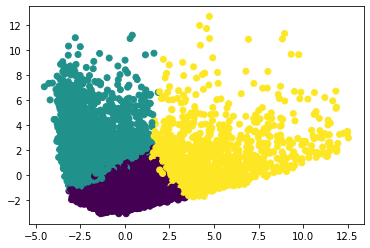

In [82]:
plt.scatter(reduced_cr[:,0], reduced_cr[:,1], c=km_3.labels_.astype(float))

#### Cluster 4,5,6,7,8 Solutions

In [83]:
#3 clusters
km_3 = KMeans(n_clusters=3,random_state=123).fit(reduced_cr)

# 4 clusters
km_4=KMeans(n_clusters=4,random_state=123).fit(reduced_cr)

# 5 clusters
km_5=KMeans(n_clusters=5,random_state=123).fit(reduced_cr)

# 6 clusters
km_6=KMeans(n_clusters=6,random_state=123).fit(reduced_cr)

# 7 clusters
km_7=KMeans(n_clusters=7,random_state=123).fit(reduced_cr)

# 8 clusters
km_8=KMeans(n_clusters=8,random_state=123).fit(reduced_cr)

In [84]:
data_scaled.head(10)


,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,TENURE,Mon_av_PURCHASE,Purchase_type_on_off,Purchase_type_installment,Limit_Usage,Mon_cash_adv,Purchase_Type_both
0,-0.551327,-0.489121,-0.427513,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,-0.557505,-0.579714,-0.642945,-0.493151,0.36068,-0.559583,-1.039436,0.881992,-0.979687,-0.510509,-0.670193
1,-0.613881,-0.489121,-0.568588,3.101370,-1.221758,-0.678661,-0.916995,0.593147,0.166685,-0.675130,1.089747,0.263600,0.36068,-0.620854,-1.039436,-1.133797,0.205564,2.704783,-0.670193
2,-0.106917,0.215778,-0.568588,-0.527079,1.269843,2.673451,-0.916995,-0.685371,-0.557505,-0.102638,-0.456289,-0.097448,0.36068,-0.124282,0.962060,-1.133797,-0.149529,-0.510509,-0.670193
3,0.369006,0.877517,-0.568588,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,-0.376457,-0.627422,-0.732573,-0.352941,0.36068,0.341886,0.962060,-1.133797,-0.463809,-0.407813,-0.670193
4,-0.603389,-0.474534,-0.568588,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,-0.557505,-0.627422,-0.431298,-0.407742,0.36068,-0.610578,0.962060,-1.133797,0.842675,-0.510509,-0.670193
5,0.260344,-0.489121,1.403039,-0.527079,0.439310,-0.678661,0.550784,-0.685371,-0.557505,-0.293468,-0.110752,1.346530,0.36068,0.235451,-1.039436,0.881992,1.764576,-0.510509,-0.670193
6,4.035657,5.348155,0.449374,-0.527079,1.269843,2.673451,1.599199,-0.685371,-0.557505,2.378162,2.089631,-0.445648,0.36068,3.933379,0.962060,0.881992,-0.963860,-0.510509,1.492109
7,-0.327867,-0.489121,0.076455,-0.527079,1.269843,-0.678661,1.599199,-0.685371,-0.557505,-0.102638,-0.430973,-0.174719,0.36068,-0.340702,-1.039436,0.881992,1.159800,-0.510509,-0.670193
8,-0.049006,0.113959,-0.272832,-0.527079,-0.391225,-0.399319,-0.287947,-0.685371,-0.557505,-0.436591,-0.426881,-0.353249,0.36068,-0.067558,0.962060,0.881992,-0.683545,-0.510509,1.492109
9,0.226458,0.679313,-0.568588,-0.527079,-0.806490,-0.119974,-0.916995,-0.685371,-0.557505,-0.532007,-0.215252,-0.524957,0.36068,0.202260,0.962060,-1.133797,-1.056681,-0.510509,-0.670193


### Silhouette Coefficient to find optimum cluster solution

In [85]:
# calculate SC for K=3 through K=8
k_range = range(3, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(reduced_cr, km.labels_))

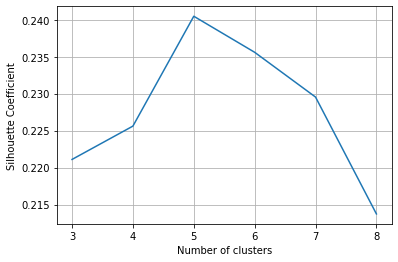

In [86]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### Elbow Analysis to find optimum solution

In [87]:
# calculate for K=2 through K=8
k_range = range(3, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit_transform(reduced_cr)
    scores.append(km.inertia_)
scores

[112956.48439752962,
 96532.301739202,
 85659.63965563313,
 78456.91013400724,
 73990.14004668863,
 70376.40350215309]

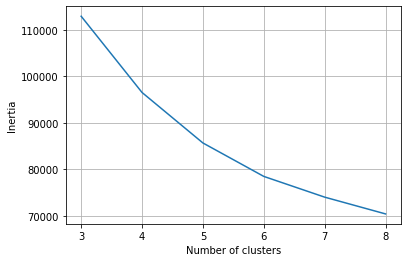

In [88]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)

In [89]:
C5=pd.concat([data_scaled[new_cols],pd.Series(km_5.labels_,name='cluster_5')],axis=1)


### Mean value of each variable group by Cluster- 5

In [90]:
# Mean value of each variable group by Cluster- 6
cluster_5_output=C5.groupby('cluster_5').apply(lambda x: x[new_cols].mean()).T
cluster_5_output

cluster_5,0,1,2,3,4
PURCHASES,-0.462314,-0.352477,3.010991,-0.277297,0.254074
ONEOFF_PURCHASES,-0.282420,-0.264443,2.724309,-0.487594,0.232587
INSTALLMENTS_PURCHASES,-0.561978,-0.343334,2.049346,0.189051,0.218523
CASH_ADVANCE,-0.129889,2.104939,-0.153149,-0.452476,-0.357770
PURCHASES_FREQUENCY,-0.937942,-0.581521,1.112166,0.590201,0.734976
ONEOFF_PURCHASES_FREQUENCY,-0.325590,-0.283000,1.717433,-0.674578,0.741351
PURCHASES_INSTALLMENTS_FREQUENCY,-0.897227,-0.514690,0.968229,0.818107,0.477258
CASH_ADVANCE_FREQUENCY,0.071561,1.764807,-0.274761,-0.560419,-0.345002
CASH_ADVANCE_TRX,-0.060982,1.864892,-0.169459,-0.477029,-0.313168
PURCHASES_TRX,-0.575625,-0.389089,2.470343,-0.105568,0.415736


## Profiling

In [91]:
# Conactenating labels found through Kmeans with data 
data_scaled['cluster_3'] = km_3.labels_
data_scaled['cluster_4'] = km_4.labels_
data_scaled['cluster_5'] = km_5.labels_
data_scaled['cluster_6'] = km_6.labels_
data_scaled['cluster_7'] = km_7.labels_
data_scaled['cluster_8'] = km_8.labels_

In [97]:
data_scaled.head()

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,...,Purchase_type_installment,Limit_Usage,Mon_cash_adv,Purchase_Type_both,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,-0.551327,-0.489121,-0.427513,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,-0.557505,-0.579714,...,0.881992,-0.979687,-0.510509,-0.670193,0,0,3,0,4,6
1,-0.613881,-0.489121,-0.568588,3.101370,-1.221758,-0.678661,-0.916995,0.593147,0.166685,-0.675130,...,-1.133797,0.205564,2.704783,-0.670193,1,3,1,4,2,7
2,-0.106917,0.215778,-0.568588,-0.527079,1.269843,2.673451,-0.916995,-0.685371,-0.557505,-0.102638,...,-1.133797,-0.149529,-0.510509,-0.670193,0,0,4,5,0,4
3,0.369006,0.877517,-0.568588,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,-0.376457,-0.627422,...,-1.133797,-0.463809,-0.407813,-0.670193,0,0,0,0,0,6
4,-0.603389,-0.474534,-0.568588,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,-0.557505,-0.627422,...,-1.133797,0.842675,-0.510509,-0.670193,0,0,0,1,0,1


In [92]:
size=pd.concat([pd.Series(data_scaled.cluster_3.size), pd.Series.sort_index(data_scaled.cluster_3.value_counts()), pd.Series.sort_index(data_scaled.cluster_4.value_counts()),
           pd.Series.sort_index(data_scaled.cluster_5.value_counts()), pd.Series.sort_index(data_scaled.cluster_6.value_counts()),
           pd.Series.sort_index(data_scaled.cluster_7.value_counts()), pd.Series.sort_index(data_scaled.cluster_8.value_counts())])

In [94]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size*100/data_scaled.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,100.0,52.067039,33.620112,14.312849,37.798883,10.212291,39.351955,12.636872,34.27933,11.675978,...,21.687151,5.944134,9.631285,21.541899,5.050279,18.793296,18.167598,3.01676,12.648045,11.150838


In [46]:
Profling_output = pd.concat([data_scaled.apply(lambda x: x.mean()).T, data_scaled.groupby('cluster_3').apply(lambda x: x.mean()).T, data_scaled.groupby('cluster_4').apply(lambda x: x.mean()).T,
          data_scaled.groupby('cluster_5').apply(lambda x: x.mean()).T, data_scaled.groupby('cluster_6').apply(lambda x: x.mean()).T,
          data_scaled.groupby('cluster_7').apply(lambda x: x.mean()).T, data_scaled.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)

Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [47]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8.950000e+03,4659.000000,3010.000000,1281.000000,3383.000000,914.000000,3522.000000,1131.000000,3068.000000,1045.000000,...,1942.000000,532.000000,862.000000,1928.000000,452.000000,1683.000000,1625.000000,270.000000,1133.000000,997.000000
Seg_Pct,1.000000e+02,52.055866,33.631285,14.312849,37.798883,10.212291,39.351955,12.636872,34.279330,11.675978,...,21.698324,5.944134,9.631285,21.541899,5.050279,18.804469,18.156425,3.016760,12.659218,11.139665
PURCHASES,-1.813117e-15,-0.211026,-0.484288,1.905446,-0.448419,2.357709,-0.073018,-0.336674,-0.462314,-0.352477,...,-0.577639,3.153144,1.379974,-0.464527,-0.084846,-0.235406,0.006745,4.146662,-0.410306,-0.526653
ONEOFF_PURCHASES,-7.236223e-15,-0.225426,-0.363334,1.673613,-0.271146,2.144783,-0.216086,-0.249328,-0.282420,-0.264443,...,-0.453329,2.842826,1.260080,-0.292789,-0.058855,-0.488403,0.004401,3.702503,-0.251079,-0.396652
INSTALLMENTS_PURCHASES,5.149698e-16,-0.087135,-0.480296,1.445476,-0.548879,1.640879,0.209035,-0.335212,-0.561978,-0.343334,...,-0.544868,2.146188,1.079768,-0.550117,-0.080623,0.285023,0.030884,2.659419,-0.495483,-0.521800
CASH_ADVANCE,-4.228126e-15,-0.448297,0.748114,-0.127409,-0.175919,-0.229335,-0.416469,2.008445,-0.129889,2.104939,...,0.144800,-0.196564,-0.348038,-0.245981,3.061289,-0.448734,-0.336576,-0.152509,-0.313757,1.092655
PURCHASES_FREQUENCY,-3.716084e-16,0.249132,-0.853419,1.099210,-0.859253,1.109260,0.715974,-0.555852,-0.937942,-0.581521,...,-1.089999,1.128493,1.083894,-0.893500,-0.134877,0.809004,0.638730,1.111133,-0.782873,-0.966083
ONEOFF_PURCHASES_FREQUENCY,2.021052e-15,-0.127594,-0.432299,1.479843,-0.274765,1.685520,-0.091782,-0.254445,-0.325590,-0.283000,...,-0.592041,1.765645,1.523746,-0.315353,-0.036123,-0.676150,0.498572,1.810743,-0.328280,-0.479759
PURCHASES_INSTALLMENTS_FREQUENCY,2.353921e-16,0.206893,-0.723218,0.946893,-0.860921,0.926907,0.746635,-0.498980,-0.897227,-0.514690,...,-0.854300,0.991859,0.844464,-0.862524,-0.133025,1.037027,0.397817,1.000269,-0.751368,-0.817849
CASH_ADVANCE_FREQUENCY,-6.906456e-16,-0.516317,0.892047,-0.218220,-0.013425,-0.313922,-0.461641,1.731424,0.071561,1.764807,...,0.553114,-0.315944,-0.413254,0.010603,2.115480,-0.553201,-0.291173,-0.274982,-0.440617,1.361326


# Based on Silhoutee coefficient and Profiling we choose 5 cluster Solution# 

#### Cluster plot

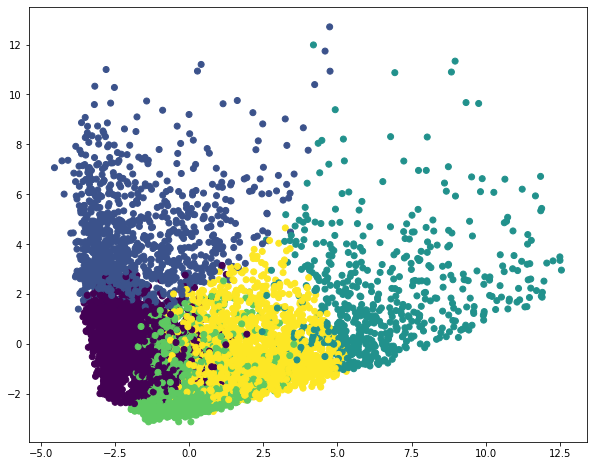

In [48]:
plt.figure(figsize=(10, 8))
plt.scatter(reduced_cr[:,0], reduced_cr[:,1], c=km_5.labels_.astype(float))